
# BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021

## Session-8: Classification with k-Nearest Neighbor Algorithms


Machine learning provides a unified framework to learn from data and predict outcomes. <br>
Classification is a typical machine learning task that **aims to predict categorical outcomes**  (i.e., as opposed to predicting numeric outcome). <br>
Various classification scenarios arise in different application domains; e.g., spam e-mail filters, desease detection, fraud detection, image recognition, etc. 

* $m$ samples/instances/data points/observations: $x^{(1)},...,x^{(m)}$ 
* $n$ features/input variables/independent variables: $X_1,...,X_n$
* Output variable/dependent variable/response variable/label: $Y$
* **Goal**: estimate a mapping $\hat{Y}=h(X)$

### Understanding Class Predictions - The Confusion Matrix

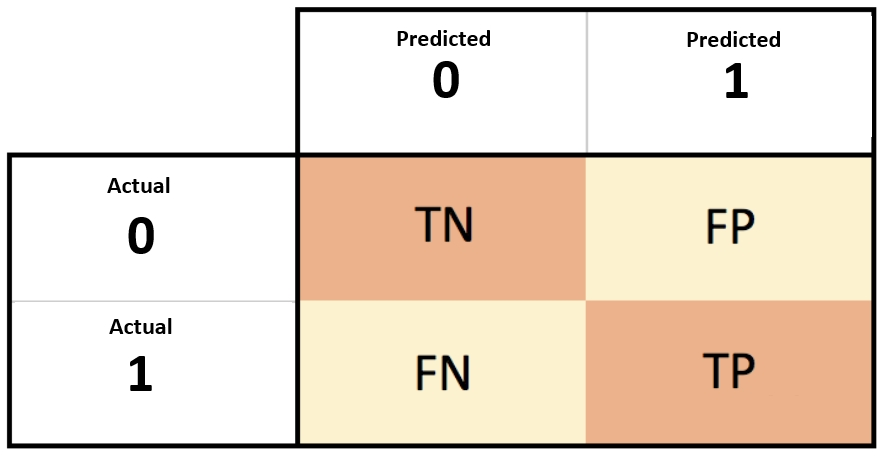

In [1]:
from IPython import display 
display.Image("https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg", width = 400, height = 400)

 - **True Positive (TP)**: A Positive correctly identified as a Positive 
 - **True Negative (TN)**: A Negative correctly identified as a Negative 
 - **False Positive (FP)**: A Negative incorrectly identified as a Positive 
 - **False Negative (FN)**: A Positive incorrectly identified as a Negative 
 
#### Evaluation Metrics 
 - **Accuracy**: `(TP + TN)/(TP + TN + FP + FN)`<br>
 - **Precision**: `TP/(TP + FP)`<br>
 - **Recall (Sensitivity)**: `TP/(TP + FN)` (**Specificity:** `TN / (TN + FP)`)<br>
 - **F1-Score**: `2[(Precision * Recall) / (Precision + Recall)]`<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [2]:
# confusion matrix example - binary classification (2 classes). Note the positions of TN, FP, FN, TP
y_true = [0, 1, 0, 1]
y_predicted = [1, 1, 1, 0]
cm = confusion_matrix(y_true,y_predicted)
cm

array([[0, 2],
       [1, 1]], dtype=int64)

In [3]:
# # flattening the matrix: Read https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

### <mark>Exercise</mark>

The Company CrimAnalytics Inc. has developed a risk assessment tool to be used by the criminal justice system of State X, to help judges determine whether a defendant should be kept in jail or be allowed out while awaiting trial. If a defendant was ultimately rearrested, either after being released or jailed pre-trial, he/she is recognized as a `high-risk` individual and otherwise as a `low-risk` individual.

The tool is trained on historical defendant data to find correlations between various factors (e.g., age, history with the criminal justice system), and whether or not the person was ultimately rearrested. Given the data of a new defendant who awaits trial, the tool can predict whether that defendant is a high-risk individual who will be rearrested for a new crime during the trial-waiting period or not. 

CrimAnalytics Inc. wants to evaluate the performance of their new risk assessment tool so that they used a hold-out sample (data not used to train the tool) of historical pre-trial data for `100` defendants and predicted their risk score (high or low) using the tool. The company also had access to information whether each defendant was ultimately rearrested either after being released or jailed pre-trial.

1. Use the given excel sheet and fill up the confusion matrix for this study. You can treat the `high-risk` class as the positive class. Explain `TP`, `TN`, `FP`, and `FN` in the context of this study. 
2. Out of the `100` defendants examined in this study, `40` were ultimately rearrested. The tool scored `45` people as of `high-risk` while only `35` of them were ultimately rearrested. Compute the accuracy, precision, recall, and F1 score for CrimAnalytics risk assessment tool.

### Training a Binary Classifier

In this notebook, we will use the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://goo.gl/U2Uwz2) from [Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).<br>

This dataset contains various information about breast cancer tumors, along with their associated class labels - **malignant or benign**.

  * **2 Classes**: Malignant or Benign
  * **569 instances** (i.e, observations) where each instance represents a breast cancer tumor
  * **30 features or attributes** such as the radius of the tumor, texture, smoothness, compactness, and area
  * Missing Attributes: None

**Our Goal**: Using this dataset, we will build a machine learning model that uses the features to predict whether a tumor is malignant or benign.

In [4]:
data_bc = datasets.load_breast_cancer()
print(data_bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
type(data_bc)

sklearn.utils.Bunch

In [6]:
print(data_bc.target_names)
print(data_bc.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
df_bc = pd.DataFrame(data = data_bc.data, columns=data_bc.feature_names)
df_bc['outcome'] = data_bc.target
print(df_bc.shape)
df_bc.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df_bc.isnull().sum().sum()

0

In [10]:
df_bc['outcome'].value_counts() # 212 - Malignant (Class Label: 0), 357 - Benign, (Class Label: 1)

1    357
0    212
Name: outcome, dtype: int64

In [11]:
# let's change the class label to indicate 1 for malignant tumors and 0 for benign tumors
df_bc.replace({'outcome': {0: 1, 1: 0}}, inplace=True)
df_bc['outcome'].value_counts()

0    357
1    212
Name: outcome, dtype: int64

### Creating Training and Test Datasets
Learning the parameters of a prediction function and testing it on the same data would lead to overfitting. In other words, a model that would just repeat the labels of the samples that it has seen before would have a perfect score but would fail to predict anything useful on yet-unseen data. To avoid it, it is common practice to hold out part of the available data as a test set.

In [13]:
random_state =  np.random.RandomState(42)

In [14]:
X = df_bc.iloc[:, 0:30].values # .values converts the DataFrame into the NumPy representation

In [15]:
print(X.shape)
print(type(X))

(569, 30)
<class 'numpy.ndarray'>


In [16]:
Y = df_bc.iloc[:, 30].values

In [17]:
print(Y.shape)
print(type(Y))

(569,)
<class 'numpy.ndarray'>


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [19]:
# check class balance in the training set
unique_elements, counts_elements = np.unique(Y_train, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[268 158]


In [20]:
# check class distribution - test set
unique_elements, counts_elements = np.unique(Y_test, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[89 54]


### Feature Selection

To select the 10 best features for our classifier, we will use the `sklearn.feature_selection` module that improves estimators’ performance. For this example, we use a univariate feature selection method that works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. We specifically use the `SelectKBest` routine that removes all but the  highest scoring features.
Read more about scikit-learn's feature selection [here](https://scikit-learn.org/stable/modules/feature_selection.html).

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

In [22]:
ch2 = SelectKBest(chi2, k=10) # perform a chi-square test to select the top 10 features 
X_train = ch2.fit_transform(X_train, Y_train)
X_test = ch2.transform(X_test)

In [23]:
print(X_train.shape)
print(X_test.shape)

(426, 10)
(143, 10)


In [24]:
cols = ch2.get_support(indices=True)
df_bc.iloc[:,cols].columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')

### Feature Scaling
Feature scaling through standardization can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.
Read about the importance of feature scaling [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Classification Algorithms

We use a classification algorithm that learns the training set to predict the class membership. Once the model is trained, we can evaluate the prediction performance of the model, using the test set. 
 
<div class="alert alert-block alert-info">However, note that it is the best to keep a "validation set" to examine and improve the models through hyperparameter tuning and various algorithms, so that the best model can be chosen among several. Finally, the best model can be evaluated using the test set. 

In place of a validation set, "cross-validation" schemes can be used which we will discuss later in this notebook.
</div>
   
There are many classification algorithms available for supervised learning, and each algorithm has its own strengths and weaknesses. In this notebook, we will use the k-nearest-neighbors algorithm for binary classification. [Supervised Learning with Scikit-Learn](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) is a good read to understand how these algorithms work.

### k-Nearest Neighbors (k-NN)

The `k-nearest-neighbors` algorithm does not make assumptions about the form of the relationship between the class membership (`Y`) and the predictors (`X`). Instead, this method draws information from similarities between the predictor values of the records of the dataset.

A distance metric is used to measure the distance between records based on their predictor values. The most popular distance measure is the `Euclidean` distance. 

The `Euclidean` distance between two records ($x_1,x_2,....,x_p$) and ($u_1,u_2,....,u_p$) is
$$ \sqrt{(x_1-u_1)^2+(x_2-u_2)^2+..............+(x_p-u_p)^2}$$

There are several other distance metrics in use.


#### Classification Rule
After computing the distances between the record to be classified and the existing records, we need a rule to assgin a class to the new record based on the classes of its neighbors:

- Find the nearest `k` neighbors to the record to be classified
- Use a majority decision rule to classify the record, where the record is classified as a member of the majority class of the `k` neighbors.

When k = 1, then the new data point is assigned to the class of that single nearest neighbor.

![KNN](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform') # initialize a KNN classifier
knn.fit(X_train, Y_train) # train classifer with training set

KNeighborsClassifier(n_neighbors=1)

### Model Evaluation - Confusion Matrix
Read more about Scikit learn's [confusion matrix function definition](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [an example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) on the web site. Classification report function definition is [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report).

In [27]:
Y_train_predicted = knn.predict(X_train) # note that we are predicting the outcome for the training set

In [28]:
print("Training Classification accuracy:", knn.score(X_train, Y_train))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train, Y_train_predicted))

Training Classification accuracy: 1.0


Training Confusion matrix: 
[[268   0]
 [  0 158]]


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       158

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [29]:
#predicting the outcome for the test set
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.951048951048951


Test Confusion matrix: 
[[86  3]
 [ 4 50]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        89
           1       0.94      0.93      0.93        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [30]:
from sklearn.metrics import plot_confusion_matrix

[[86  3]
 [ 4 50]]


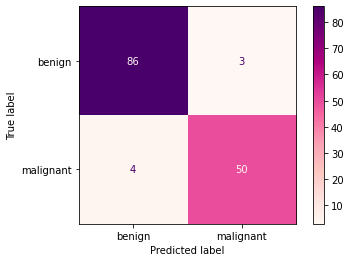

In [31]:
disp = plot_confusion_matrix(knn, X_test, Y_test,
                                 display_labels=['benign','malignant'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

### Annotations for the Confusion Matrix
* **True Positives (TP)**: The model correctly predicted the tumor as malignant when it was indeed malignant 
* **True Negatives (TN)**: The model correctly predicted the tumor as benign when it was indeed benign 
* **False Positives(FP)**: The model incorrectly predicted the tumor as malignant when it was indeed benign 
* **False Negatives(FN)**: The model incorrectly predicted the tumor as benign when it was indeed malignant

### Model Evaluation - ROC Curve
The **[Receiver Operating Characteristic (ROC) curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)** typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. While this is not very realistic, it does mean that a larger area under the curve (AUC) is usually better.It is also the better choice for model evaluation when classes are imbalanced.

In [32]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

Area under the ROC: 0.9461090303786934


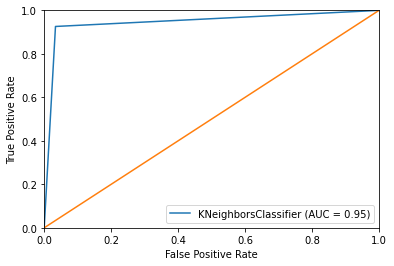

In [33]:
viz = plot_roc_curve(knn, X_test, Y_test)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

### Tuning Hyperparameters

Let's tune the `n_neighbors` and `weights` hyperparameters and evaluate the performance of the kNN classifier.

In [34]:
df_knn = pd.DataFrame(columns= ['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])

for neighbor_count in range (1,6):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric) # initialize a KNN classifier
        knn_ht.fit(X_train, Y_train)

        Y_pred_prob_ht = knn_ht.predict_proba(X_test)[:, 1]
       
        accuracy = knn_ht.score(X_test,Y_test)
        f1 = f1_score(Y_test,knn_ht.predict(X_test),average='weighted')
        roc = roc_auc_score(Y_test, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        df_knn = df_knn.append(row_to_add, ignore_index=True)

df_knn.set_index(['neighbors','weight'], inplace=True)
df_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.951049  0.950957  0.946109
          distance  0.951049  0.950957  0.946109
2         uniform   0.951049  0.950279  0.967853
          distance  0.951049  0.950957  0.967853
3         uniform   0.979021  0.978895  0.987308
          distance  0.979021  0.978895  0.985643
4         uniform   0.972028  0.971797  0.986371
          distance  0.979021  0.978895  0.984603
5         uniform   0.972028  0.971797  0.984499
          distance  0.972028  0.971797  0.983666

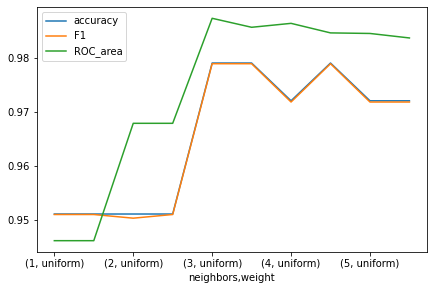

In [35]:
df_knn.plot(figsize = (7,4.5));

### Cross Validation



<img src="cv.png" width = "500">

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. Thus, knowledge about the test set can leak into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.<br>

As partitioning the available data into three sets, drastically reduces the number of samples which can be used for learning the model, a procedure called `cross validation` is used. In the basic approach, called `k-fold cross validation`, the training set is split into `k` smaller sets (k folds), a model is trained using `k-1` of the folds as training data, and the resulting model is validated on the remaining part of the data.

Read more about scikit learn's cross valiadation procedures [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

In [36]:
knn_cv = KNeighborsClassifier(n_neighbors=3, weights='uniform')

In [37]:
scores_accuracy =  cross_val_score(knn_cv, X_train, Y_train, cv=5, scoring = 'accuracy')
scores_accuracy

array([0.91860465, 0.90588235, 0.97647059, 0.92941176, 0.88235294])

In [38]:
scores_accuracy.mean()

0.9225444596443229

In [39]:
scores_f1_macro =  cross_val_score(knn_cv, X_train, Y_train, cv=5, scoring = 'f1_macro')
scores_f1_macro

array([0.91344357, 0.8969697 , 0.97424242, 0.92149015, 0.87121212])

In [40]:
scores_f1_macro.mean() # Mean f1 score

0.9154715911975015

In [41]:
metrics = ['f1_macro', 'precision_macro', 'recall_macro', ]
scores_multiple = cross_validate(knn_cv, X_train, Y_train, cv=5, scoring = metrics)
sorted(scores_multiple.keys())  

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [42]:
print('Avg. Precision:', scores_multiple['test_precision_macro'].mean())   
print('Avg. Recall:', scores_multiple['test_recall_macro'].mean())    
print('Avg. f1:', scores_multiple['test_f1_macro'].mean())   

Avg. Precision: 0.926209103939995
Avg. Recall: 0.9087960145172561
Avg. f1: 0.9154715911975015


### k-NN for a Numerical Outcome
The concept of k-NN can be extended to predict a continuous value (i.e., numeric outcome as in multiple regression models), with some slight modeifications.

- The process of determining neighbors by computing distances remains the same
- The next step of using a majority vote of the neighbors to determine the class is modified, such that the average outcome value of the k nearest neighbors is used to determine the prediction.
- `scikit-learn`'s `KNeighborsRegressor` can be used to make numerical predictions.
- In evaluating the performance, an error metric such as RMSE (root-mean-squared error) or another similar metric for numeric predictions can be used.

#### Extra Reading:
- [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
- [Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)
- [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

#### References
- Chapter 7 - Data Mining for Business Analytics: Concepts, techniques, and applications in Python, Galit Shmueli et al. 2019. 
- [Supervised Learning with Scikit-Learn](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning)